# yolo v8 설치 및 학습하기


## 환경설정

In [1]:
%cd /content

/content


In [2]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 17212, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 17212 (delta 43), reused 57 (delta 14), pack-reused 17088
Receiving objects: 100% (17212/17212), 9.14 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 8.3 MB/s eta 0:00:00


In [4]:
import torch
from IPython.display import Image, clear_output


In [5]:
%mkdir /content/ultralytics/pothole
%cd /content/ultralytics/pothole

/content/ultralytics/pothole


In [6]:
%pwd

'/content/ultralytics/pothole'

In [7]:
!curl -L "https://public.roboflow.com/ds/ILNfV7N15H?key=dDaBGHed7Q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0    739      0  0:00:01  0:00:01 --:--:--   739
100 46.0M  100 46.0M    0     0  10.6M      0  0:00:04  0:00:04 --:--:-- 17.8M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

## yolo v8로 학습하기

In [9]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

model.train(data='/content/ultralytics/pothole/data.yaml',epochs=100, batch=32, imgsz=640)


Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ultralytics/pothole/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae6456f79a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

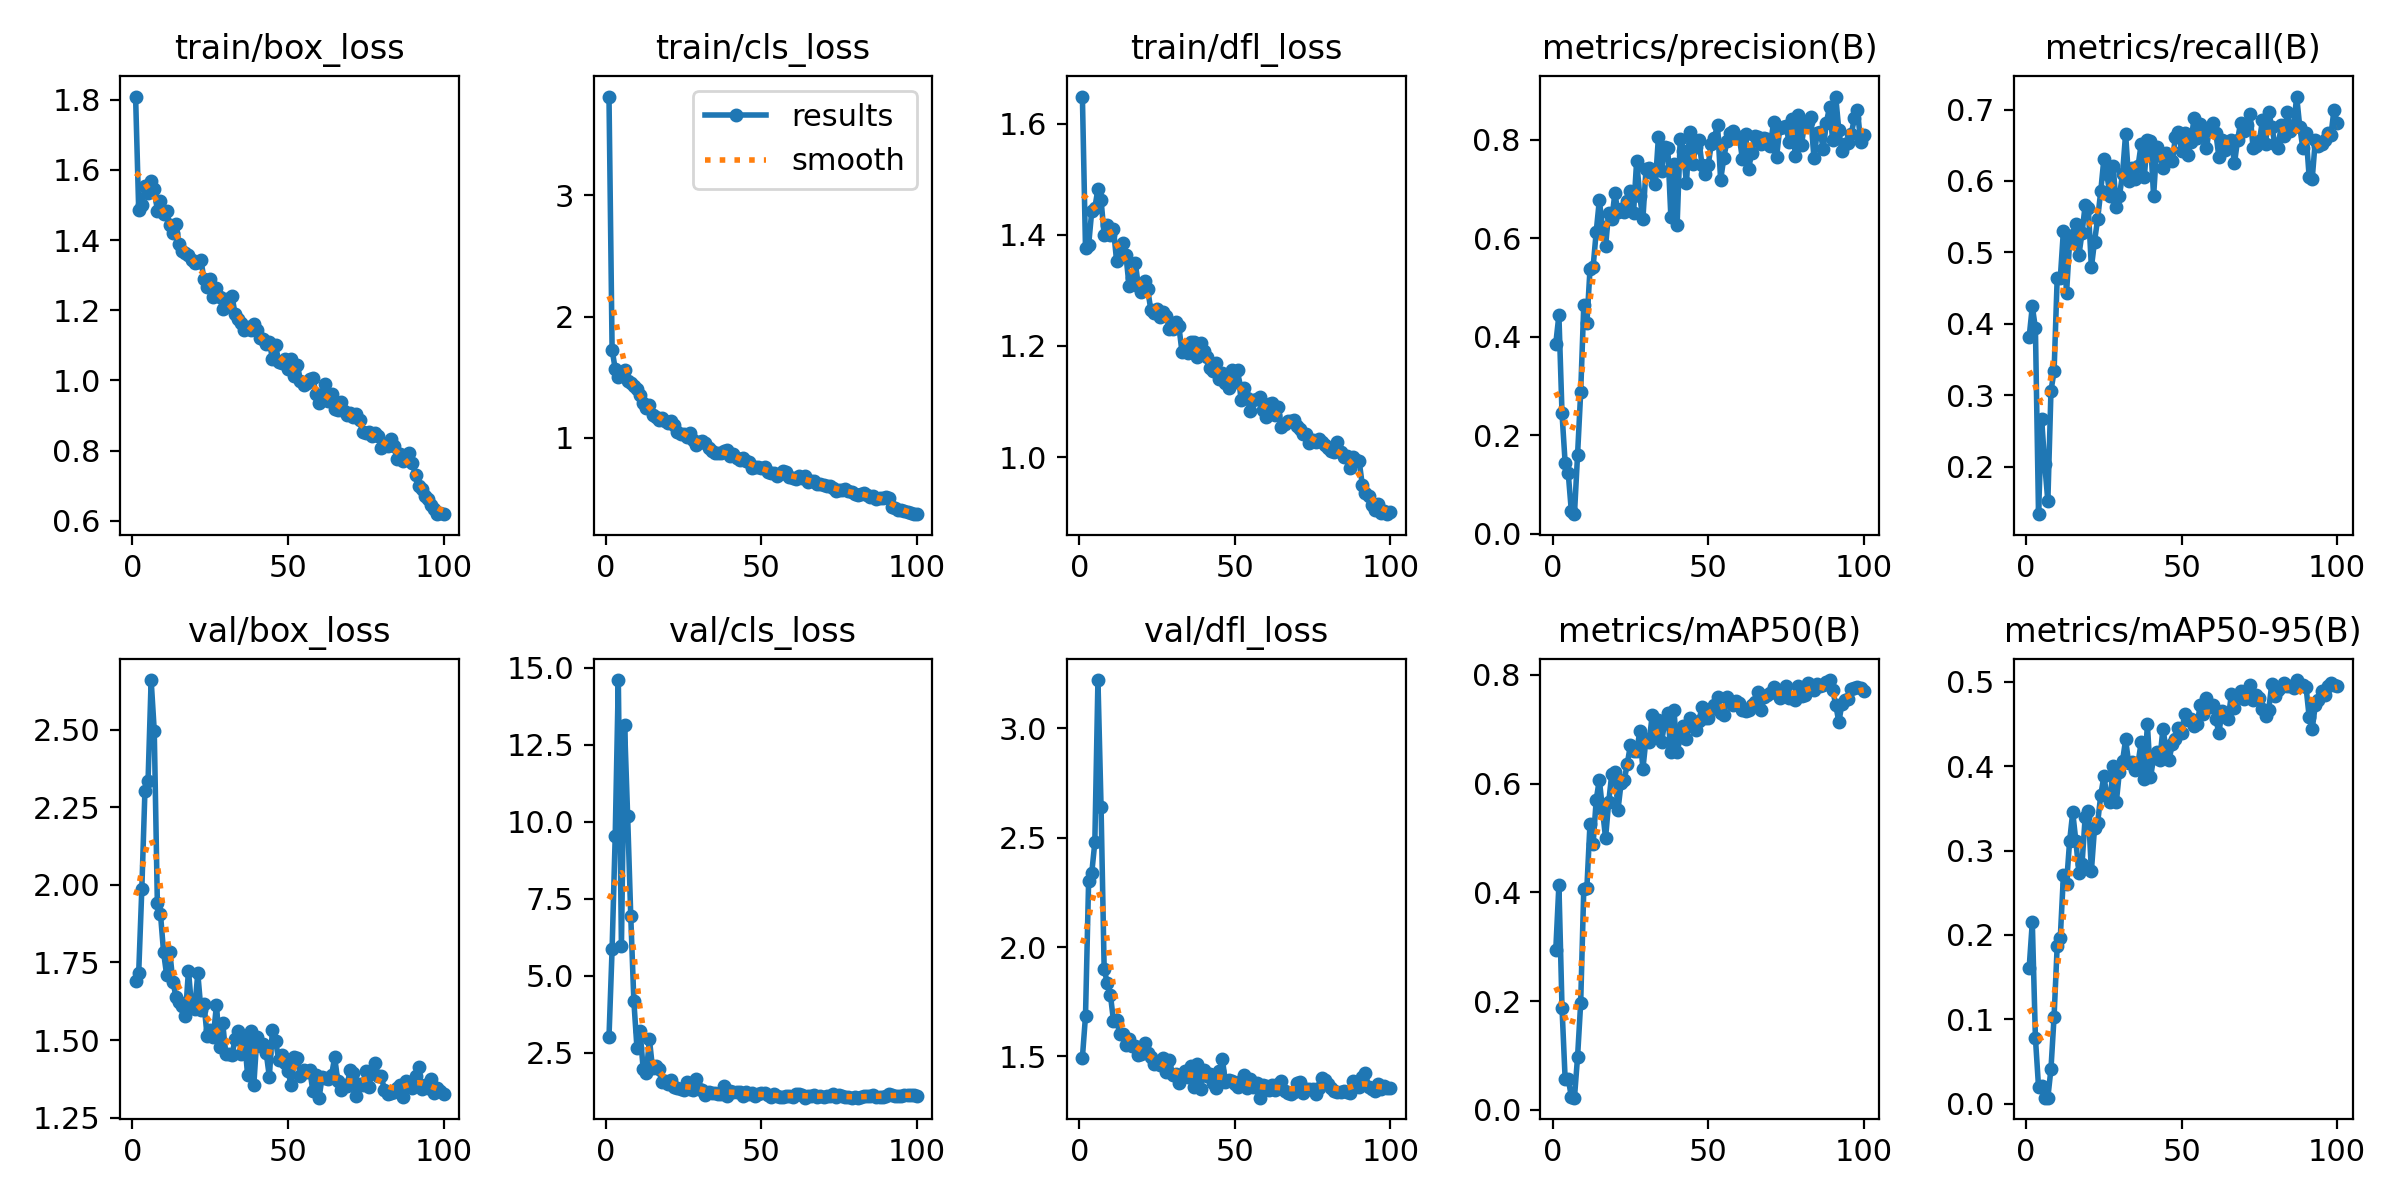

In [11]:
from IPython.display import Image

# 이미지 표시
Image(filename='/content/ultralytics/pothole/runs/detect/train/results.png', width=600)


In [12]:
model.export()

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

TorchScript: starting export with torch 2.1.0+cu118...
TorchScript: export success ✅ 4.2s, saved as 'runs/detect/train/weights/best.torchscript' (42.9 MB)

Export complete (6.5s)
Results saved to /content/ultralytics/pothole/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/content/ultralytics/pothole/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

# Data Augmentation 데이터 생성


In [13]:
def yolo_to_coco(bbox, image_width, image_height):
    """
    Convert YOLO format bounding box to COCO format.

    Args:
        bbox (list float): YOLO format bounding box [x_center, y_center, width, height].
        image_width (int): Width of the image.
        image_height (int): Height of the image.

    Returns:
        list int: COCO format bounding box [x_min, y_min, box_width, box_height].
    """
    x_center, y_center, width, height = bbox
    x_min = min(image_width-1, max(0, round((x_center - width / 2) * image_width)))
    y_min = min(image_height-1, max(0, round((y_center - height / 2) * image_height)))
    box_width = max(1, min(image_width-1-x_min, round((width) * image_width)))
    box_height = max(1, min(image_height-1-y_min, round((height) * image_height)))

    return [x_min, y_min, box_width, box_height]

def coco_to_yolo(bbox, image_width, image_height):
    """
    Convert COCO format bounding box to YOLO format.

    Args:
        bbox (list int): COCO format bounding box [x_min, y_min, box_width, box_height].
        image_width (int): Width of the image.
        image_height (int): Height of the image.

    Returns:
        list float: YOLO format bounding box [x_center, y_center, width, height].
    """
    x_min, y_min, box_width, box_height = bbox
    x_center = min(1., (x_min + box_width / 2.) / image_width)
    y_center = min(1., (y_min + box_height / 2.) / image_height)
    width = min(1., (box_width) / image_width)
    height = min(1., (box_height) / image_height)

    return [x_center, y_center, width, height]

def yolo_to_pascal_voc(bbox, image_width, image_height):
    """
    Convert YOLO format bounding box to Pascal VOC format.

    Args:
        bbox (list): YOLO format bounding box [x_center, y_center, width, height].
        image_width (int): Width of the image.
        image_height (int): Height of the image.

    Returns:
        list: Pascal VOC format bounding box [x_min, y_min, x_max, y_max].
    """
    x_center, y_center, width, height = bbox
    x_min = max(0, min(image_width-2, round((x_center - width / 2) * image_width)))
    y_min = max(0, min(image_height-2, round((y_center - height / 2) * image_height)))
    x_max = min(image_width-1, max(x_min+1, round((x_center + width / 2) * image_width)))
    y_max = min(image_height-1, max(y_min+1, round((y_center + height / 2) * image_height)))

    return [x_min, y_min, x_max, y_max]

def pascal_voc_to_yolo(bbox, image_width, image_height):
    """
    Convert Pascal VOC format bounding box to YOLO format.

    Args:
        bbox (list): Pascal VOC format bounding box [x_min, y_min, x_max, y_max].
        image_width (int): Width of the image.
        image_height (int): Height of the image.

    Returns:
        list: YOLO format bounding box [x_center, y_center, width, height].
    """
    x_min, y_min, x_max, y_max = bbox
    x_center = (x_min + x_max) / 2. / image_width
    y_center = (y_min + y_max) / 2. / image_height
    width = (x_max - x_min) / image_width
    height = (y_max - y_min) / image_height

    return [x_center, y_center, width, height]


In [14]:
%mkdir /content/ultralytics/pothole/train_aug #이상하게 오류가 거릴면서 잘안됨
#따라서 하위에 새로운 폴더 train_aug를 생성한뒤 하위에 images,labels을 생성한다

NotImplementedError: ignored

In [15]:
# copy all the images in 'test/images' folder and save rotated version of those in 'test_aug/images' folder
# test/images는 원본 파일로 수정되거나 삭제되지 않도록 주의해야 함. 모든 변경 생성되는 파일은 'test_aug' 폴더에 저장되도록 해야 함.
import cv2
import os
import random
import glob
import shutil
import albumentations as A

category_ids = []
category_id_to_name = {0: 'pothole'}

SOURCE_PATH = '/content/ultralytics/pothole/train'
SOURCE_DATA_PATH = f'{SOURCE_PATH}'+'/images'
SOURCE_LABEL_PATH = f'{SOURCE_PATH}'+'/labels'

TARGET_PATH = '/content/ultralytics/pothole/train_aug'
TARGET_DATA_PATH = f'{TARGET_PATH}'+'/images'
TARGET_LABEL_PATH = f'{TARGET_PATH}'+'/labels'

image_files = os.listdir(SOURCE_DATA_PATH)


In [16]:
# ==> 90도 랜덤 회전
# - 랜덤 회전
# - 90도 랜덤 회전 + 수평 플립
# - 랜덤 회전 + 수평 플립
# - 90도 랜덤 회전 + 수직 플립
# - 랜덤 회전 + 수직 플립
# - random crop 적용
augment_type = 'rot90_'
for filename in image_files:
    pat, ext = os.path.splitext(filename)
    src_image_file = f'{SOURCE_DATA_PATH}/'+filename
    src_label_file = f'{SOURCE_LABEL_PATH}/'+pat+'.txt'
    print(src_image_file)
    print(src_label_file)

    dst_image_file = f'{TARGET_DATA_PATH}/'+augment_type+filename
    dst_label_file = f'{TARGET_LABEL_PATH}/'+augment_type+pat+'.txt'
    print(dst_image_file)
    print(dst_label_file)

    bboxes = []
    category_ids = []

    image = cv2.imread(src_image_file, cv2.IMREAD_COLOR)

    if os.path.isfile(src_label_file):
        f = open(src_label_file, 'r')
        for label in f.readlines():
            x = label.split()
            class_id = x.pop(0)

            x = yolo_to_pascal_voc([float(x[0]), float(x[1]), float(x[2]), float(x[3])], image.shape[1], image.shape[0])
            x.append(str(class_id))
            bboxes.append(x)
        f.close()

    print(len(bboxes), len(category_ids))
    print(bboxes)
    print(category_ids)

    random.seed()
    transform = A.Compose(
        [
        #  A.Rotate(border_mode=cv2.BORDER_CONSTANT, value=[0,0,0], p=1)
         A.RandomRotate90(p=1)
        ],
        bbox_params=A.BboxParams(format='pascal_voc'), #현재 albumentations의 버그 때문에 pascal_voc 형태로 변형하고 마지막에 다시 yolo 형태로 변형함
    )
    transformed = transform(image=image, bboxes=bboxes)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']

    cv2.imwrite(dst_image_file, transformed_image)
    print(transformed_bboxes)

    if len(bboxes) > 0:
        f = open(dst_label_file, 'w')
        for label in transformed_bboxes:
            class_id = label[4]
            x = [label[0], label[1], label[2], label[3]]
            x = pascal_voc_to_yolo(x, transformed_image.shape[1], transformed_image.shape[0])
            f.write(f'{int(class_id)} {x[0]:.6f} {x[1]:.6f} {x[2]:.6f} {x[3]:.6f}\n')
        f.close()

/content/ultralytics/pothole/train/images/img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.jpg
/content/ultralytics/pothole/train/labels/img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.txt
/content/ultralytics/pothole/train_aug/images/rot90_img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.jpg
/content/ultralytics/pothole/train_aug/labels/rot90_img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.txt
1 0
[[165, 208, 336, 279, '0']]
[]
[(208.0, 235.0, 279.0, 406.0, '0')]
/content/ultralytics/pothole/train/images/img-636_jpg.rf.a6173bddbf7d20589954172debd64256.jpg
/content/ultralytics/pothole/train/labels/img-636_jpg.rf.a6173bddbf7d20589954172debd64256.txt
/content/ultralytics/pothole/train_aug/images/rot90_img-636_jpg.rf.a6173bddbf7d20589954172debd64256.jpg
/content/ultralytics/pothole/train_aug/labels/rot90_img-636_jpg.rf.a6173bddbf7d20589954172debd64256.txt
7 0
[[131, 157, 287, 187, '0'], [200, 127, 289, 143, '0'], [242, 109, 271, 118, '0'], [321, 107, 380, 128, '0'], [378, 146, 449, 183, '0'

In [17]:
# - 90도 랜덤 회전
# ==> 랜덤 회전
# - 90도 랜덤 회전 + 수평 플립
# - 랜덤 회전 + 수평 플립
# - 90도 랜덤 회전 + 수직 플립
# - 랜덤 회전 + 수직 플립
# - random crop 적용
augment_type = 'rot_'
for filename in image_files:
    pat, ext = os.path.splitext(filename)
    src_image_file = f'{SOURCE_DATA_PATH}/'+filename
    src_label_file = f'{SOURCE_LABEL_PATH}/'+pat+'.txt'
    print(src_image_file)
    print(src_label_file)

    dst_image_file = f'{TARGET_DATA_PATH}/'+augment_type+filename
    dst_label_file = f'{TARGET_LABEL_PATH}/'+augment_type+pat+'.txt'
    print(dst_image_file)
    print(dst_label_file)

    bboxes = []
    category_ids = []

    image = cv2.imread(src_image_file, cv2.IMREAD_COLOR)

    if os.path.isfile(src_label_file):
        f = open(src_label_file, 'r')
        for label in f.readlines():
            x = label.split()
            class_id = x.pop(0)

            x = yolo_to_pascal_voc([float(x[0]), float(x[1]), float(x[2]), float(x[3])], image.shape[1], image.shape[0])
            x.append(str(class_id))
            bboxes.append(x)
        f.close()

    print(len(bboxes), len(category_ids))
    print(bboxes)
    print(category_ids)

    random.seed()
    transform = A.Compose(
        [
            A.Rotate(border_mode=cv2.BORDER_CONSTANT, value=[0,0,0], p=1)
        ],
        bbox_params=A.BboxParams(format='pascal_voc'), #현재 albumentations의 버그 때문에 pascal_voc 형태로 변형하고 마지막에 다시 yolo 형태로 변형함
    )
    transformed = transform(image=image, bboxes=bboxes)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']

    cv2.imwrite(dst_image_file, transformed_image)
    print(transformed_bboxes)

    if len(bboxes) > 0:
        f = open(dst_label_file, 'w')
        for label in transformed_bboxes:
            class_id = label[4]
            x = [label[0], label[1], label[2], label[3]]
            x = pascal_voc_to_yolo(x, transformed_image.shape[1], transformed_image.shape[0])
            f.write(f'{int(class_id)} {x[0]:.6f} {x[1]:.6f} {x[2]:.6f} {x[3]:.6f}\n')
        f.close()

/content/ultralytics/pothole/train/images/img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.jpg
/content/ultralytics/pothole/train/labels/img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.txt
/content/ultralytics/pothole/train_aug/images/rot_img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.jpg
/content/ultralytics/pothole/train_aug/labels/rot_img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.txt
1 0
[[165, 208, 336, 279, '0']]
[]
[(181.0816764745026, 195.19356329940317, 363.65064201273213, 300.0, '0')]
/content/ultralytics/pothole/train/images/img-636_jpg.rf.a6173bddbf7d20589954172debd64256.jpg
/content/ultralytics/pothole/train/labels/img-636_jpg.rf.a6173bddbf7d20589954172debd64256.txt
/content/ultralytics/pothole/train_aug/images/rot_img-636_jpg.rf.a6173bddbf7d20589954172debd64256.jpg
/content/ultralytics/pothole/train_aug/labels/rot_img-636_jpg.rf.a6173bddbf7d20589954172debd64256.txt
7 0
[[131, 157, 287, 187, '0'], [200, 127, 289, 143, '0'], [242, 109, 271, 118, '0'], [321, 107, 380, 128, 

In [18]:
# - 90도 랜덤 회전
# - 랜덤 회전
# ==> 90도 랜덤 회전 + 수평 플립
# - 랜덤 회전 + 수평 플립
# - 90도 랜덤 회전 + 수직 플립
# - 랜덤 회전 + 수직 플립
# - random crop 적용

augment_type = 'rot90HF_'
for filename in image_files:
    pat, ext = os.path.splitext(filename)
    src_image_file = f'{SOURCE_DATA_PATH}/'+filename
    src_label_file = f'{SOURCE_LABEL_PATH}/'+pat+'.txt'
    print(src_image_file)
    print(src_label_file)

    dst_image_file = f'{TARGET_DATA_PATH}/'+augment_type+filename
    dst_label_file = f'{TARGET_LABEL_PATH}/'+augment_type+pat+'.txt'
    print(dst_image_file)
    print(dst_label_file)

    bboxes = []
    category_ids = []

    image = cv2.imread(src_image_file, cv2.IMREAD_COLOR)

    if os.path.isfile(src_label_file):
        f = open(src_label_file, 'r')
        for label in f.readlines():
            x = label.split()
            class_id = x.pop(0)

            x = yolo_to_pascal_voc([float(x[0]), float(x[1]), float(x[2]), float(x[3])], image.shape[1], image.shape[0])
            x.append(str(class_id))
            bboxes.append(x)
        f.close()

    print(len(bboxes), len(category_ids))
    print(bboxes)
    print(category_ids)

    random.seed()
    transform = A.Compose(
        [
            # A.Rotate(border_mode=cv2.BORDER_CONSTANT, value=[0,0,0], p=1)
            A.RandomRotate90(p=1),
            A.HorizontalFlip(p=1)
        ],
        bbox_params=A.BboxParams(format='pascal_voc'), #현재 albumentations의 버그 때문에 pascal_voc 형태로 변형하고 마지막에 다시 yolo 형태로 변형함
    )
    transformed = transform(image=image, bboxes=bboxes)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']

    cv2.imwrite(dst_image_file, transformed_image)
    print(transformed_bboxes)

    if len(bboxes) > 0:
        f = open(dst_label_file, 'w')
        for label in transformed_bboxes:
            class_id = label[4]
            x = [label[0], label[1], label[2], label[3]]
            x = pascal_voc_to_yolo(x, transformed_image.shape[1], transformed_image.shape[0])
            f.write(f'{int(class_id)} {x[0]:.6f} {x[1]:.6f} {x[2]:.6f} {x[3]:.6f}\n')
        f.close()

/content/ultralytics/pothole/train/images/img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.jpg
/content/ultralytics/pothole/train/labels/img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.txt
/content/ultralytics/pothole/train_aug/images/rot90HF_img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.jpg
/content/ultralytics/pothole/train_aug/labels/rot90HF_img-505_jpg.rf.722ce02b299e455f7436b3ebbf0403b6.txt
1 0
[[165, 208, 336, 279, '0']]
[]
[(208.0, 165.0, 279.0, 336.0, '0')]
/content/ultralytics/pothole/train/images/img-636_jpg.rf.a6173bddbf7d20589954172debd64256.jpg
/content/ultralytics/pothole/train/labels/img-636_jpg.rf.a6173bddbf7d20589954172debd64256.txt
/content/ultralytics/pothole/train_aug/images/rot90HF_img-636_jpg.rf.a6173bddbf7d20589954172debd64256.jpg
/content/ultralytics/pothole/train_aug/labels/rot90HF_img-636_jpg.rf.a6173bddbf7d20589954172debd64256.txt
7 0
[[131, 157, 287, 187, '0'], [200, 127, 289, 143, '0'], [242, 109, 271, 118, '0'], [321, 107, 380, 128, '0'], [378, 146, 449, 

다른 방법도 있지만 간단하게 이정도만 하겠습니다.
## 재학습

In [19]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [20]:
%%writetemplate /content/ultralytics/pothole/data.yaml
train: ../train_aug/images
test: ../test/images
val: ../valid/images

nc: 1
names: ['pothole']

In [ ]:
%cat /content/ultralytics/pothole/data.yaml

NotImplementedError: ignored

In [21]:
import cv2
from ultralytics import YOLO

model = YOLO("/content/ultralytics/pothole/runs/detect/train/weights/best.pt")

model.train(data='/content/ultralytics/pothole/data.yaml',epochs=100, batch=32, imgsz=640)
#기존에 모델에서 학습을 계속해야하지만 새로 모델을 다운받아서 진행했음으로 다시 진행


Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/ultralytics/pothole/runs/detect/train/weights/best.pt, data=/content/ultralytics/pothole/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae6b49ab8b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

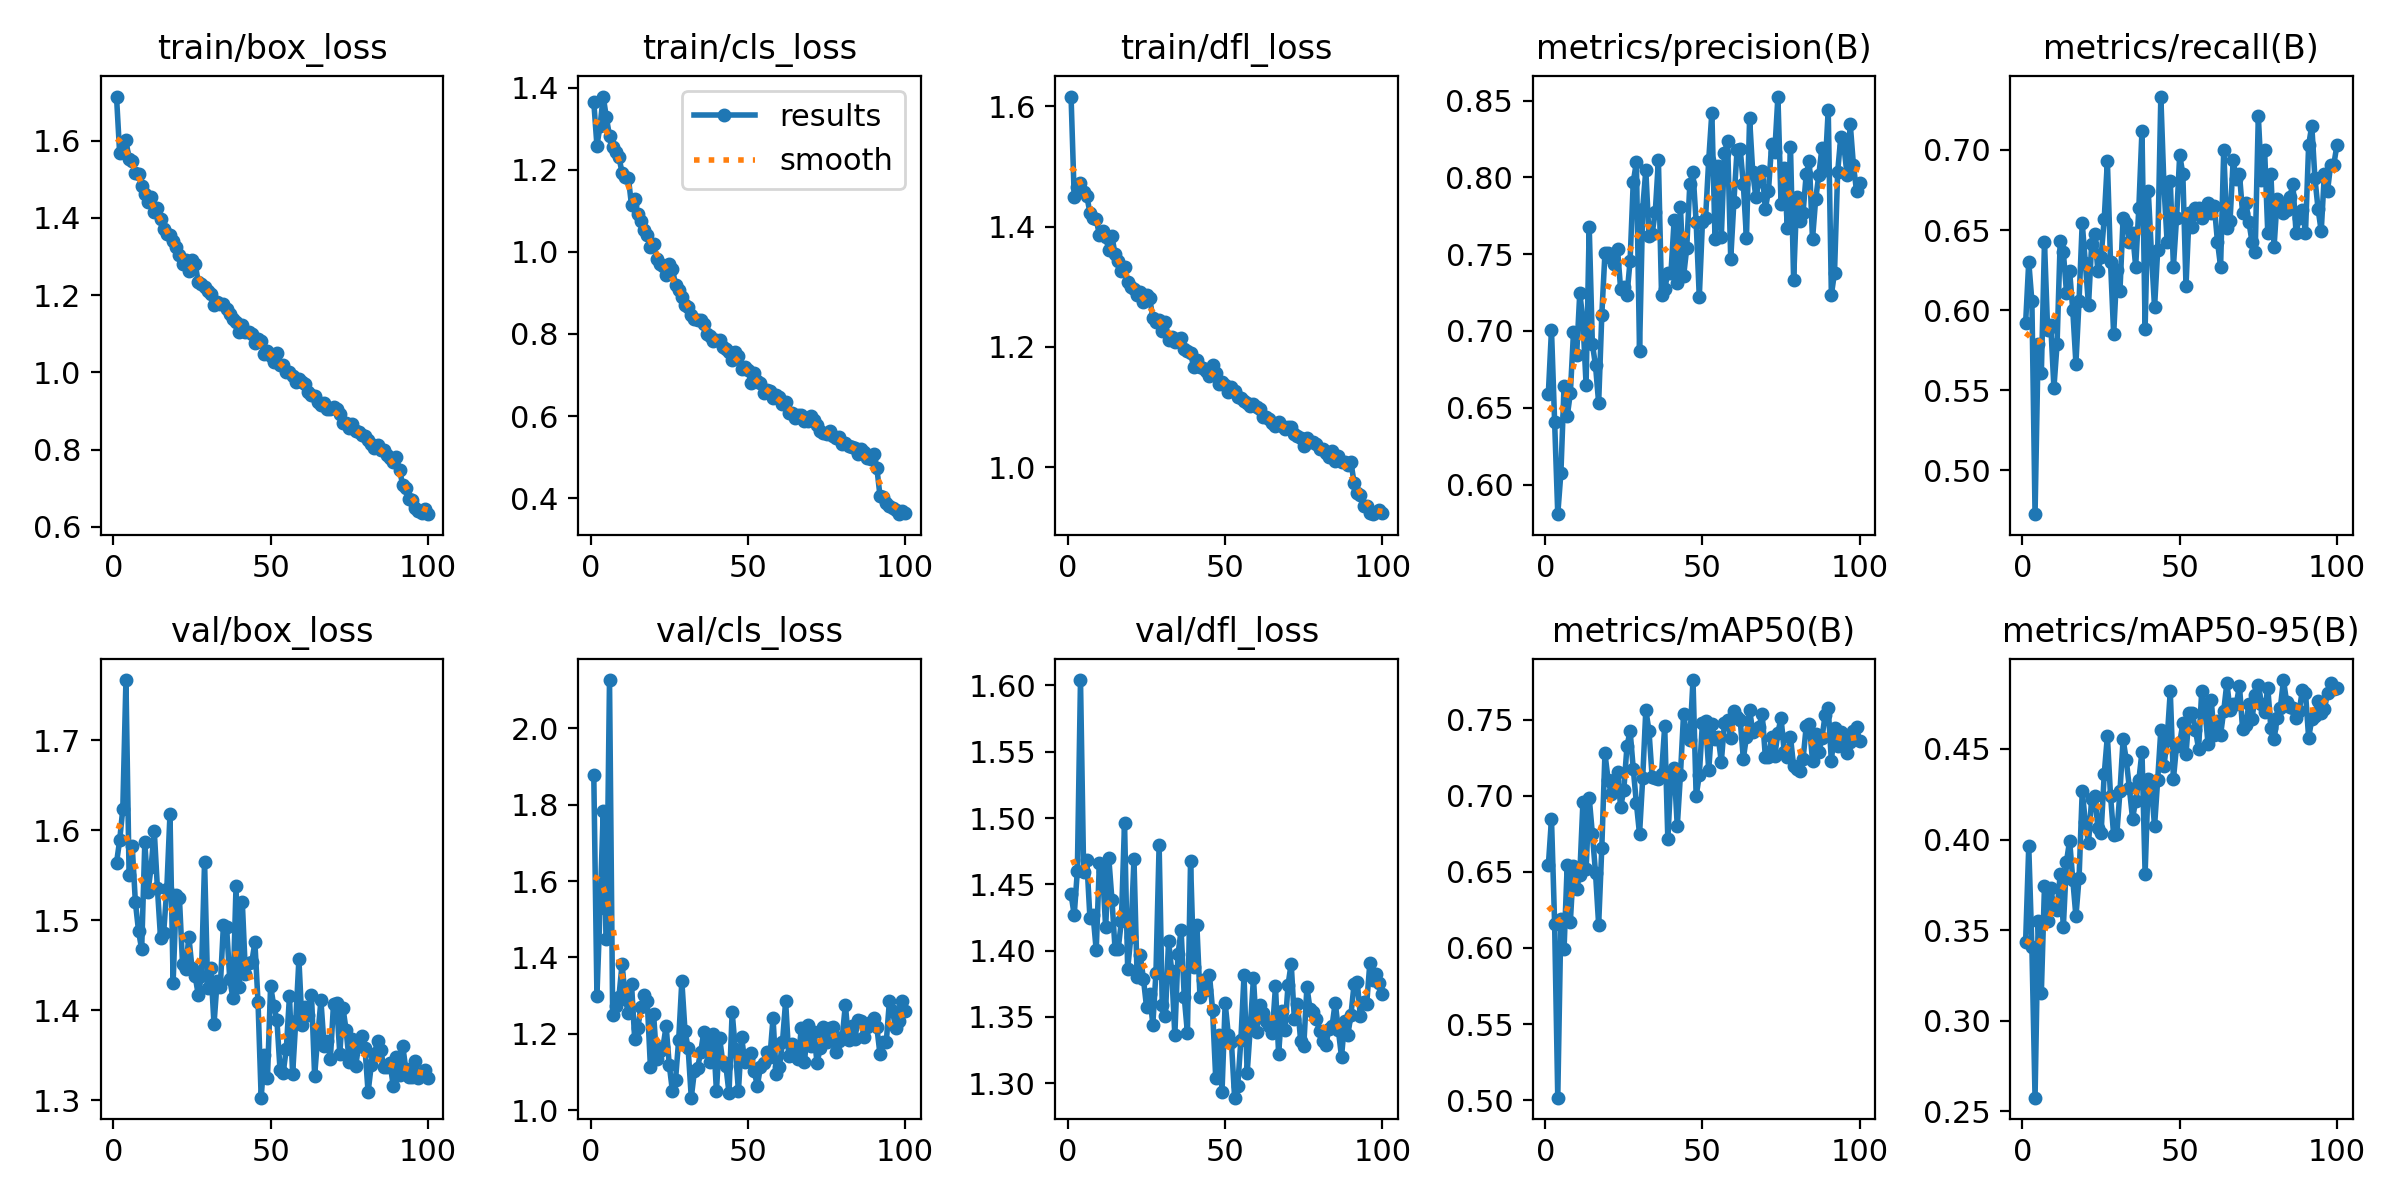

In [22]:
from IPython.display import Image

# 이미지 표시
Image(filename='/content/ultralytics/pothole/runs/detect/train2/results.png', width=600)


In [23]:
#일반 학습 검증
model = YOLO("/content/ultralytics/pothole/runs/detect/train/weights/best.pt")
model.val()

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ultralytics/pothole/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]
                   all        133        330      0.796      0.698       0.78      0.497
Speed: 0.3ms preprocess, 21.6ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae6aa49c250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 